# <center>Linear Regression</center>



Linear Regression is a supervised machine learning technique used to predict the value of unknown data using known data. A powerful way of fitting the data is to use the method of least squares which gives a closed-form solution. Another method is to use gradient descent which is an iterative solution<be>

First, let's define the problem as a linear model (The output variable is a linear combination of the input variable(s)): <br>
Suppose we are given data $(x_i, y_i), i = 1,....,n$. Fit the data such that $y = w_0 + w_1x + \epsilon$. This problem can be written in matrix form as: 
$$y  = Xw + \epsilon$$
$y$ is a n x 1 vector <br>
X is a n x m matrix <br>
w is a m x 1 matrix to be solved for <br>
$\epsilon$ is the noise/error term, (Note: It is important to note that we assume the noise comes from a Gaussian distribution with a mean of 0 and variance $\sigma^2$


The least squares problem can be defined as:
$$\underset{w}{min} ||y - Xw||_2^2$$
$$ = \underset{w}{min}[(y - Xw)^T(y - Xw)]$$
$$= \underset{w}{min}[y^Ty - y^TXw - w^TX^Ty + w^TX^TXw]$$
(Note that $y^TXw$,  $w^TX^Ty$ are equal because a transpose of a scalar is still the same scalar) <br>
To solve the optimization problem we need to take the partial derivative with respect to the w matrix and set that equal to 0 and solve for w
$$\frac{\partial}{\partial w} = 0 = -2X^Ty + 2X^TXw$$
Assuming that the columns of X are independent, we can solve for w by doing the following:
$$w = (X^TX)^{-1}X^Ty$$
It is important to note that the above solution is a formal solution but is not practical to compute. It can lead to roundoff errors not giving accurate answers. A more stable way to solve the least squares problem is to use QR factorization. 

Let's try solving least squares using both the formal solution and QR factorization with a 1 dimensional problem (univeriate linear regression) without noise.

In [2]:
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
print('Version information')

print('python: {}'.format(sys.version))
print('matplotlib: {}'.format(matplotlib.__version__))
print('numpy: {}'.format(np.__version__))

Version information
python: 3.10.13 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:24:38) [MSC v.1916 64 bit (AMD64)]
matplotlib: 3.8.0
numpy: 1.26.2


In [71]:
np.random.seed(0)

#Generate Random data
X_orig = 0.0000002*np.random.normal(size=(20,1)) + 0.34
X = np.hstack((np.ones_like(X_orig), X_orig))
print("Dimensions of X: ", X.shape)

#Initialize some Ground-Truth weights and compute y
w = np.array([2,-3]).reshape(-1,1)
print("Dimensions of w: ", w.shape)
y = np.dot(X,w)
print("Dimensions of y: ", y.shape)

Dimensions of X:  (20, 2)
Dimensions of w:  (2, 1)
Dimensions of y:  (20, 1)


In [72]:
#Solving for w using the formal solution
w = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
print(w)

[[ 2.00244141]
 [-3.00585938]]


In [73]:
#Solving for w using QR factorization 
w0, w1 = np.linalg.lstsq(X, y, rcond=None)[0]
print(w1, w0)

[-3.] [2.]


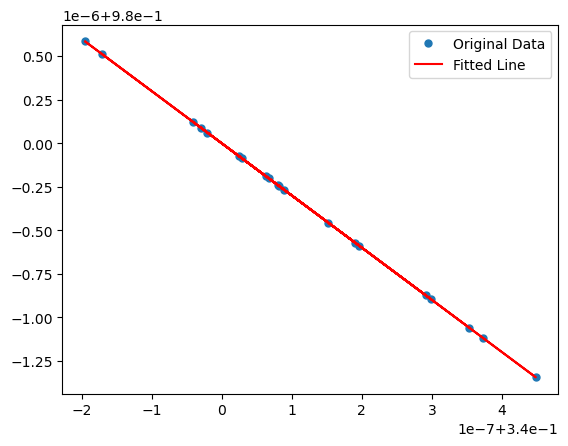

In [74]:
plt.plot(X_orig, y, 'o', label='Original Data', markersize=5)
plt.plot(X_orig, w1*X_orig + w0, 'r', label='Fitted Line')
plt.legend()
plt.show()

In [76]:
#2-D example
#Generate Random data
col_1 = 0.0000004*np.random.normal(size=(10,1)) + 0.16
col_2 = 0.00002*np.random.normal(size=(10,1)) + 0.47

X = np.hstack((np.ones_like(col_1), col_1, col_2))
print("Dimensions of X: ", X.shape)

#Initialize some Ground-Truth weights and compute y
w = np.array([-0.3, 2, -0.9]).reshape(-1,1)
print("Dimensions of w: ", w.shape)
y = np.dot(X,w)
print("Dimensions of y: ", y.shape)

Dimensions of X:  (10, 3)
Dimensions of w:  (3, 1)
Dimensions of y:  (10, 1)


In [77]:
#Solving for w using QR factorization 
w0, w1, w2 = np.linalg.lstsq(X, y, rcond=None)[0]
print(w0, w1, w2)

[-0.3] [2.] [-0.9]


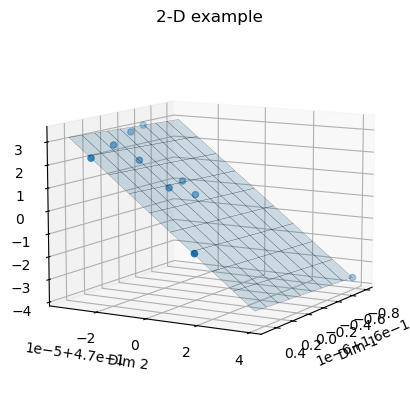

In [78]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter3D(col_1, col_2, y)

xx = np.linspace(np.min(col_1), np.max(col_1), 10)
yy = np.linspace(np.min(col_2), np.max(col_2), 10)
x_axis, y_axis = np.meshgrid(xx, yy)

z = np.zeros_like(x_axis)
mesh_points = np.vstack((x_axis.ravel(), y_axis.ravel())).T
z = w0 + w1*x_axis + w2*y_axis

ax.view_init(10, 30)
ax.plot_surface(x_axis, y_axis, z, alpha=0.2, linewidth=0.1, edgecolors='black')

ax.set_xlabel("Dim 1")
ax.set_ylabel('Dim 2')
ax.set_title("2-D example")
plt.show()

# References
https://htmlpreview.github.io/?https://github.com/echow/ml-matlab/blob/main/live/least_squares.html <br>
https://www.math.drexel.edu/~tolya/linear%20least%20squares.pdf